<a href="https://colab.research.google.com/github/Abhishekroy11/Machine_Learning_algorithms/blob/main/K_Means(WINE_DATA_SET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

##LOAD WINE DATA SET

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/WineQT.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

data =load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

scalar = StandardScaler()
scaled_Data = scalar.fit_transform(df)

###SCALING THE DATA

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_Data)
data['Cluster'] = kmeans.labels_

#FIGURE:-

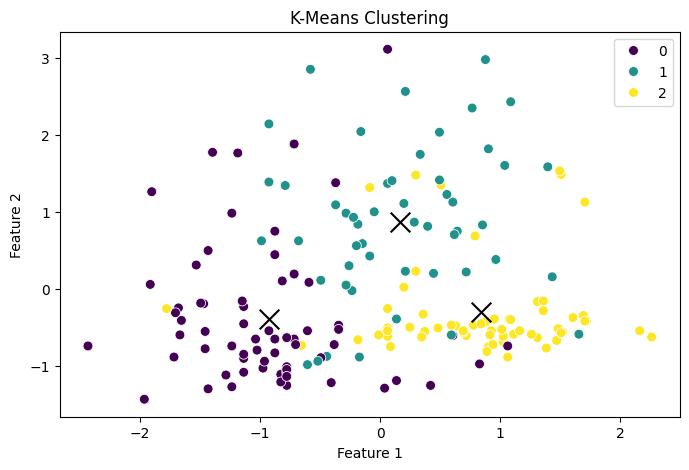

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=scaled_Data[:,0], y=scaled_Data[:,1], hue=data['Cluster'], palette= 'viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black',label='centroids', marker='x', s=200)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
K_range = range(2, 11)
I = []
for k in K_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
  kmeans.fit(scaled_Data)
  score = silhouette_score(scaled_Data, kmeans.labels_)
  print("Silhouette score for k=", k, "is:", score)
  I.append(kmeans.inertia_)

Silhouette score for k= 2 is: 0.5817500491982808
Silhouette score for k= 3 is: 0.45994823920518635
Silhouette score for k= 4 is: 0.38694104154427816
Silhouette score for k= 5 is: 0.3459012795948778
Silhouette score for k= 6 is: 0.31707940193569023
Silhouette score for k= 7 is: 0.3201967939183684
Silhouette score for k= 8 is: 0.33869173894897225
Silhouette score for k= 9 is: 0.3423598384813203
Silhouette score for k= 10 is: 0.3517926760640288


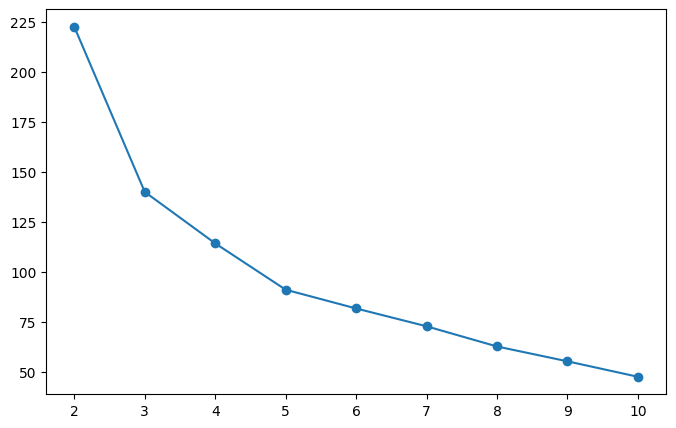

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(K_range, I, marker='o')
plt.show()

##EVALUATE THE CLUSTERS:-

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_Data, kmeans.labels_)
print("silhoutee score for k=3 is:",score)

silhoutee score for k=3 is: 0.3517926760640288


In [ ]:
display(scaled_Data)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])